# Analysis Fandango's rating system

Goal - Did films rating change after Walt Hickey analysis and title?

In [1]:
#required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
%matplotlib inline
pd.options.mode.chained_assignment = None 

#data preparation
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')
fandango_score_15 = pd.read_csv('fandango_score_comparison.csv')

#select relevant columns
rating_15 = fandango_score_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']] 
#print(fandango_score_15.head())
rating_16_17 = movie_ratings_16_17[['movie', 'year', 'fandango']]
#print(movie_ratings_16_17.head())

In [2]:
#manual Fandango rating check
sample = rating_16_17.sample(10, random_state=1)
#done - GOOD

In [3]:
# extract function
def extract_year(value_in):
    year = int(value_in[-5:-1])
    return year

In [4]:
#rating_15 = rating_15.copy()
rating_15['Year'] = rating_15['FILM'].apply(extract_year)

In [5]:
#rating_15['Year'].value_counts()
only_2015 = rating_15[rating_15['Year'] == 2015]
only_2015.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [6]:
#rating_16_17['year'].value_counts()
only_2016 = rating_16_17[rating_16_17['year'] == 2016]
only_2016.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


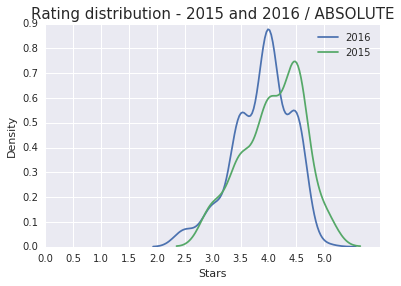

In [7]:
# Working with absolute values
a = sns.kdeplot(data=only_2016['fandango'], label='2016')
a = sns.kdeplot(data=only_2015['Fandango_Stars'], label='2015')
a.set_title('Rating distribution - 2015 and 2016 / ABSOLUTE', fontsize=15)
a.set_ylabel('density')
a.set_xlabel('stars')
a.set_xticks(arange(0,5.1,0.5))
plt.show()

In [8]:
# Examination - workng with the relative values
#data preparation
dist_2016 = (only_2016['fandango'].value_counts(normalize=True)*100).round(2)
dist_2015 = (only_2015['Fandango_Stars'].value_counts(normalize=True)*100).round(2)

In [9]:
# Join distributions
distribution = pd.concat([dist_2015, dist_2016], axis = 1)
#type(distribution)
distribution

,Fandango_Stars,fandango
2.5,NaN,3.14
3.0,8.53,7.33
3.5,17.83,24.08
4.0,28.68,40.31
4.5,37.98,24.61
5.0,6.98,0.52


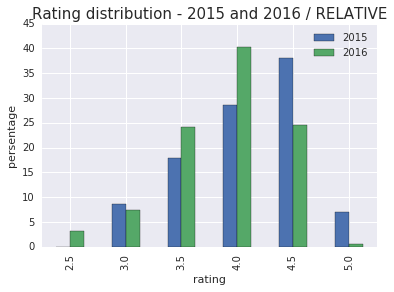

In [10]:
distribution = distribution.reset_index()
new_col_name = {'fandango':'2016',
                'Fandango_Stars':'2015',
                'index':'rating'}
distribution.rename(columns=new_col_name, inplace=True)
distribution.plot(x='rating', kind='bar')
plt.title('Rating distribution - 2015 and 2016 / RELATIVE', fontsize=15)
plt.ylabel('persentage')
plt.show()

In [11]:
#check basic statstics differences
data_dict = {'year': [2016,2015],
            'mean': [only_2016['fandango'].mean(),
                     only_2015['Fandango_Stars'].mean()],
            'median': [only_2016['fandango'].median(),
                       only_2015['Fandango_Stars'].median()],
            'mode': [float(only_2016['fandango'].mode()),
                     float(only_2015['Fandango_Stars'].mode())]
            }
statistics = pd.DataFrame(data=data_dict)
statistics = statistics.transpose()
statistics.columns = statistics.loc['year']
statistics = statistics.drop('year')
statistics

year,2016.0,2015.0
mean,3.887435,4.085271
median,4.000000,4.000000
mode,4.000000,4.500000


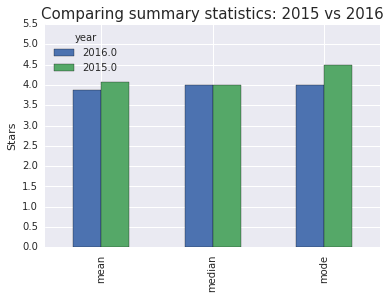

In [12]:
statistics.plot(x=statistics.index, kind='bar', yticks= arange(0,6,0.5))
plt.title('Comparing summary statistics: 2015 vs 2016', fontsize=15)
plt.ylabel('stars')
plt.show()

Conclusion - there's indeed a slight difference between ratings for popular movies in 2015 and 2016.!